In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [3]:
train_data = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /titanic/train.csv')
test_data = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /titanic/test.csv')
test_dataY = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /titanic/gender_submission.csv')

In [7]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [13]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mode()[0])
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mode()[0])
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())

In [19]:
train_data.drop(['PassengerId', 'Name', 'Ticket','Cabin'], axis = 1, inplace = True)
test_data.drop(['PassengerId', 'Name', 'Ticket','Cabin'], axis = 1, inplace = True)


In [23]:
train_data.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   28.566970    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.199572    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   24.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [21]:
tr = train_data.copy()
te = test_data.copy()

In [22]:
genders = {"male": 0, "female": 1}
embarked = {"C": 0, "Q": 1, "S": 2}
data = [tr, te]
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked)

In [44]:
tr['SiPa'] = tr['SibSp'] + tr['Parch']
te['SiPa'] = te['SibSp'] + te['Parch']

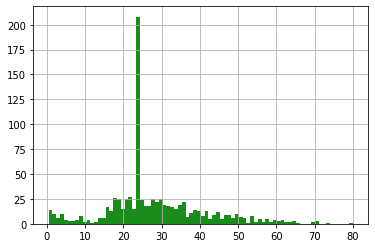

In [32]:
tr['Age'].hist(bins = 80, color = 'green', alpha = 0.9)

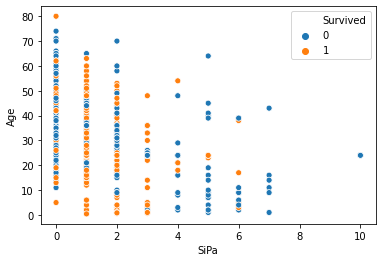

In [58]:
sns.scatterplot(x='SiPa',y='Age',hue='Survived',data=tr)

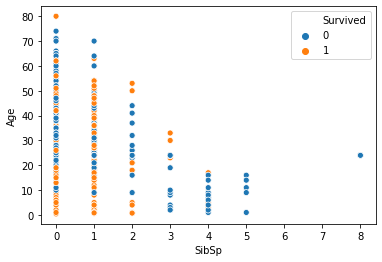

In [60]:
sns.scatterplot(x='SibSp',y='Age',hue='Survived',data=tr)

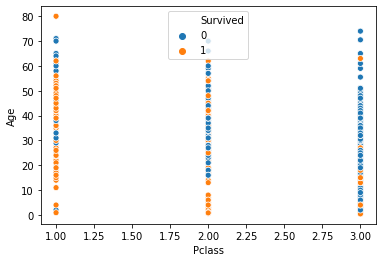

In [62]:
sns.scatterplot(x='Pclass',y='Age',hue='Survived',data=tr)

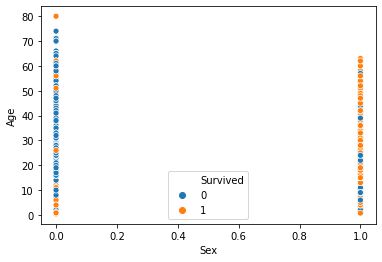

In [63]:
sns.scatterplot(x='Sex',y='Age',hue='Survived',data=tr)

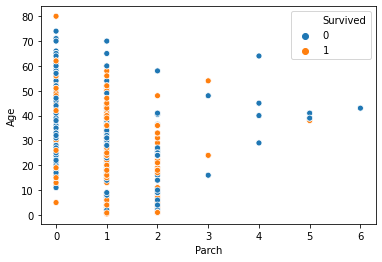

In [64]:
sns.scatterplot(x='Parch',y='Age',hue='Survived',data=tr)

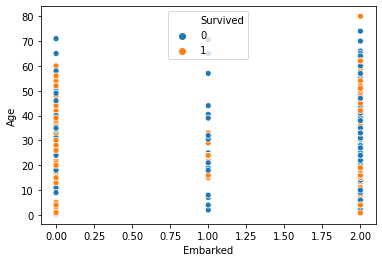

In [65]:
sns.scatterplot(x='Embarked',y='Age',hue='Survived',data=tr)

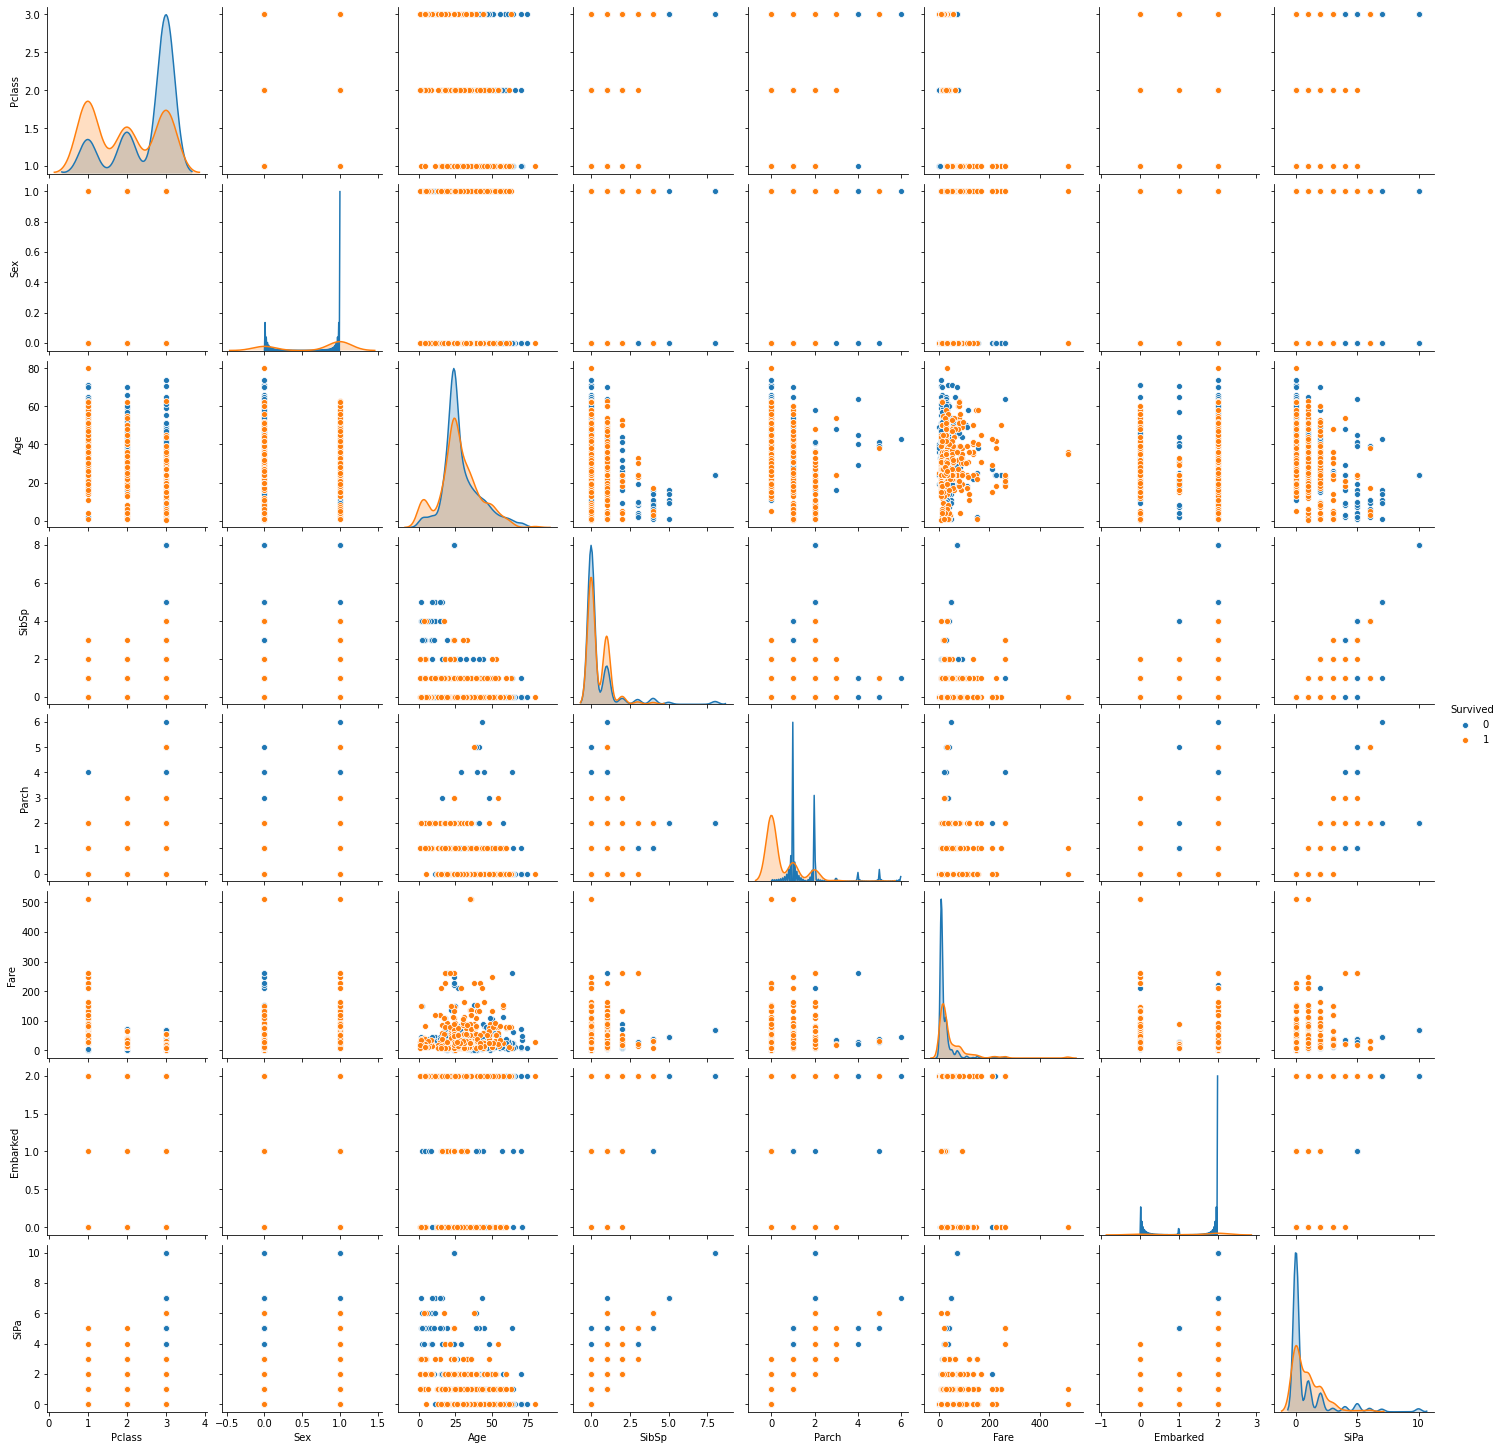

In [71]:
sns.pairplot(tr, hue="Survived")

In [182]:
d = {'Age': tr['Age'], 'Fare': tr['Fare']}
d1 = {'Pclass': tr['Pclass'], 'SiPa': tr['SiPa'], 'Sex': tr['Sex']}
dt = {'Age': te['Age'], 'Fare': te['Fare']}
dt1 = {'Pclass': te['Pclass'], 'SiPa': te['SiPa'], 'Sex': te['Sex']}
df = pd.DataFrame(data=d)
df1 = pd.DataFrame(data=d1)
dft = pd.DataFrame(data=dt)
dft1 = pd.DataFrame(data=dt1)

In [183]:
df_pca = pd.concat([df,df1],axis=1)
df_pcaT = pd.concat([dft,dft1],axis=1)

In [200]:
train = tr.copy()

In [201]:
train = train.drop(['Survived'],axis = 1)

In [215]:
features = StandardScaler().fit_transform(train)
features1 = StandardScaler().fit_transform(te)
pca = PCA(n_components=0.90, whiten=True)
a = pca.fit_transform(features)
a1 = pca.fit_transform(features1)
print("Original number of features:", a.shape[1])
print("Reduced number of features:", a1.shape[1])

Original number of features: 6
Reduced number of features: 6


In [91]:
for i in range(len(a)):
  df['Age'].iloc[i] = a[i][0]
  df['Fare'].iloc[i] = a[i][1]

In [117]:
df['Survived'] = tr['Survived']
df1['Survived'] = tr['Survived']

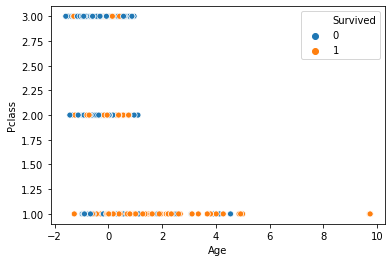

In [115]:
sns.scatterplot(x='Age',y='Pclass',hue='Survived',data=df)

In [161]:
lda = LDA(n_components=3)
a = lda.fit_transform(df,tr['Survived'])
a1 = lda.transform(dft)
b = lda.fit_transform(df1,tr['Survived'])
b1 = lda.transform(dft1)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(2, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(3, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > m

In [162]:
a = list(a)
b = list(b)
a1 = list(a1)
b1 = list(b1)

In [163]:
#t = {'f1': a, 'f2': b, 'SibSp': tr['SibSp'], 'Parch': tr['Parch'], 'Survived': tr['Survived']}
t = {'f1': a, 'f2': b, 'Survived': tr['Survived']}
t1 = {'f1': a1, 'f2': b1}
df_F = pd.DataFrame(data=t)
df_T = pd.DataFrame(data=t1)

In [137]:
df_F

f1                     f2  Survived
0    [-0.35808840971029265]  [-1.2580619027368378]         0
1      [0.5809934073434776]    [2.312214405863977]         1
2     [-0.4391964126821406]   [1.0933254716169667]         1
3     [0.27766338888891157]    [2.312214405863977]         1
4     [-0.6504017566975702]  [-1.1671792692767302]         0
..                      ...                    ...       ...
886  [-0.35840083583279014]  [-0.5122934854231711]         0
887   [0.18183948579374573]   [2.4030970393240847]         1
888  [-0.07186253612705869]   [0.8206775712366439]         0
889    [0.0155658090453085]   [0.1425922984303878]         1
890   [-0.5853218435635297]  [-1.1671792692767302]         0

[891 rows x 3 columns]

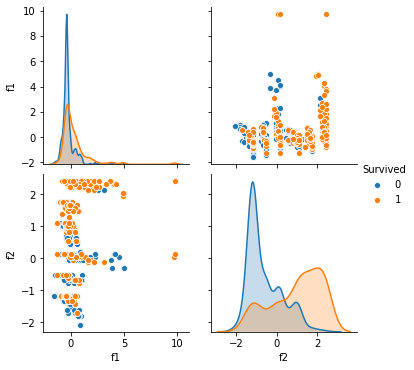

In [138]:
sns.pairplot(df_F, hue="Survived")

In [148]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

In [216]:
y_train = tr['Survived']
X_train = a
X_test = a1

In [217]:

random_forest = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(random_forest, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.73333333 0.78651685 0.75280899 0.82022472 0.78651685 0.79775281
 0.84269663 0.74157303 0.79775281 0.79775281]
Mean: 0.7856928838951311
Standard Deviation: 0.03263279352219671


In [229]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, y_train)
Y_prediction11 = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 79.69000000000001 %


In [231]:
Y_prediction11.shape

(418,)

In [232]:
y1 = np.asarray(test_dataY['Survived'])

In [221]:
y1.shape

(418,)

In [233]:
from sklearn.metrics import accuracy_score, log_loss
acc = accuracy_score(y1, Y_prediction11)
acc

0.7464114832535885

In [223]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[478,  71],
       [101, 241]])

In [224]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 0.7724358974358975
Recall: 0.7046783625730995


In [225]:
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

0.7370030581039756

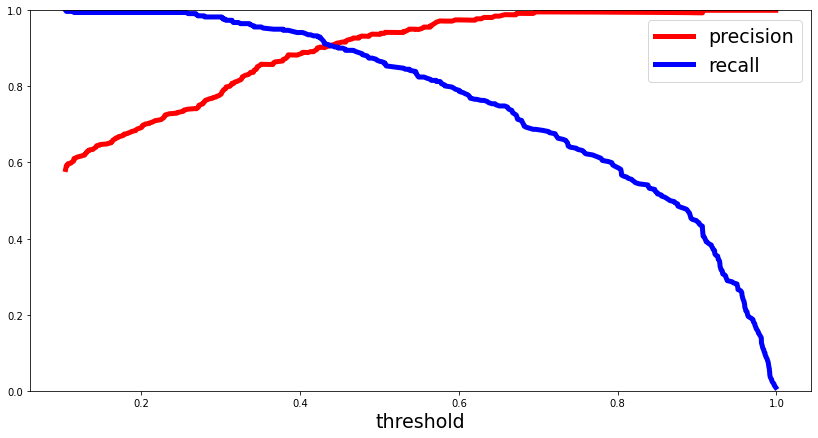

In [226]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

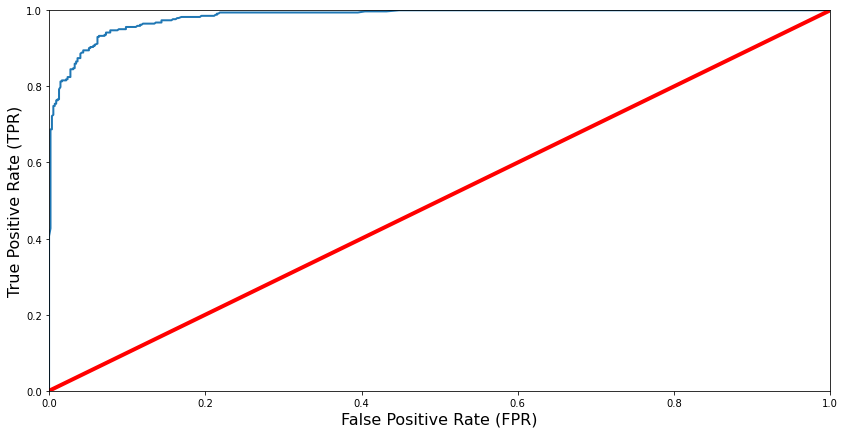

In [227]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [228]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9830526528829663


In [234]:
pred_y = Y_prediction11.reshape(-1)
all_id = np.array(test_dataY['PassengerId'])
y_pred = pd.DataFrame(list(zip(all_id, pred_y)),columns =['PassengerId', 'Survived'])
y_pred.to_csv("/content/drive/My Drive/MY ML JOURNEY/.98.csv", index=False)

In [70]:
tr.groupby(['Embarked']).mean()

Survived    Pclass       Sex  ...     Parch       Fare      SiPa
Embarked                                ...                               
0         0.553571  1.886905  0.434524  ...  0.363095  59.954144  0.750000
1         0.389610  2.909091  0.467532  ...  0.168831  13.276030  0.597403
2         0.339009  2.346749  0.317337  ...  0.411765  27.243651  0.981424

[3 rows x 8 columns]

In [59]:
tr.head(2)

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  SiPa
0         0       3    0  22.0      1      0   7.2500         2     1
1         1       1    1  38.0      1      0  71.2833         0     1